# Analysis of OKCupid Data

By Kelvin Yu and Victor Hua

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# increase the width of the pandas dataframe to allow scrolling through all columns

pd.options.display.max_columns = 100

In [2]:
train = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\train\train.csv")
test = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\test\test.csv")
train = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\train\train.csv")
year3 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year3.csv")
year2 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year2.csv")
year1 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year1.csv")
year0 = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\year0.csv")
china = pd.read_csv(r"C:\Users\Kelvin Yu\Documents\Sophomore Year\COS 424\Final Project\data\china.csv")

Why are there -1s in income? They indicate "rather not say". Let's remove it for now

In [3]:
train = train.drop(['COMPANY', 'NOTES'], axis = 1)
test = test.drop(['COMPANY', 'NOTES'], axis = 1)
year3 = year3.drop(['COMPANY', 'NOTES', 'Year_3.0'], axis = 1)
year2 = year2.drop(['COMPANY', 'NOTES', 'Year_2.0'], axis = 1)
year1 = year1.drop(['COMPANY', 'NOTES', 'Year_1.0'], axis = 1)
year0 = year0.drop(['COMPANY', 'NOTES', 'Year_0.0'], axis = 1)
china = china.drop(['COMPANY', 'NOTES'], axis = 1)

In [4]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 4)
pca_year3 = PCA(n_components = 4)
pca_year2 = PCA(n_components = 4)
pca_year1 = PCA(n_components = 4)
pca_year0 = PCA(n_components = 4)
pca_china = PCA(n_components = 4)

In [5]:
transformed_data = pca.fit(train.values) 
principal_axes = pca.transform(train.values) # applies dimensionality reduction

transformed_test = pca.fit(test.values) 
principal_axes_test = pca.transform(test.values)

transformed_year3 = pca_year3.fit(year3.values) 
principal_axes_year3 = pca_year3.transform(year3.values)

transformed_year2 = pca_year2.fit(year2.values) 
principal_axes_year2 = pca_year2.transform(year2.values)

transformed_year1 = pca_year1.fit(year1.values) 
principal_axes_year1 = pca_year1.transform(year1.values)

transformed_year0 = pca_year0.fit(year0.values) 
principal_axes_year0 = pca_year0.transform(year0.values)

transformed_china = pca_china.fit(china.values) 
principal_axes_china = pca_china.transform(china.values)

In [6]:
transformed_year3.explained_variance_

array([0.28993784, 0.25774762, 0.23423854, 0.21364805])

# Gaussian Mixture Model

In [7]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 8).fit(principal_axes)
labels = gmm.predict(principal_axes)

gmm_test = GaussianMixture(n_components = 7).fit(principal_axes_test)
labels_test = gmm.predict(principal_axes_test)

gmm_year3 = GaussianMixture(n_components = 4).fit(principal_axes_year3)
labels_year3 = gmm_year3.predict(principal_axes_year3)

gmm_year2 = GaussianMixture(n_components = 6).fit(principal_axes_year2)
labels_year2 = gmm_year2.predict(principal_axes_year2)

gmm_year1 = GaussianMixture(n_components = 2).fit(principal_axes_year1)
labels_year1 = gmm_year1.predict(principal_axes_year1)

gmm_year0 = GaussianMixture(n_components = 4).fit(principal_axes_year0)
labels_year0 = gmm_year0.predict(principal_axes_year0)

gmm_china = GaussianMixture(n_components = 3).fit(principal_axes_china)
labels_china = gmm_china.predict(principal_axes_china)

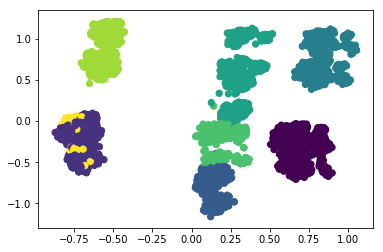

In [8]:
plt.scatter(principal_axes[:, 0], principal_axes[:, 1], c=labels, s=40, cmap='viridis');

In [9]:
clusters = pca.inverse_transform(gmm.means_)
clusters_test = pca.inverse_transform(gmm_test.means_)
clusters_year0 = pca_year0.inverse_transform(gmm_year0.means_)
clusters_year1 = pca_year1.inverse_transform(gmm_year1.means_)
clusters_year2 = pca_year2.inverse_transform(gmm_year2.means_)
clusters_year3 = pca_year3.inverse_transform(gmm_year3.means_)
clusters_china = pca_china.inverse_transform(gmm_china.means_)

In [10]:
## top features for first cluster

means1 = clusters[2, :]

means1_indicies = np.where(means1 > np.percentile(means1, 0))[0]

#lu1_indices = np.array(sorted(lu1_indices, key= lambda x: lu1[x], reverse=True))


top_cluster1_df = pd.DataFrame({'Feature': train.columns.values[means1_indicies],
                         'Cluster Proportion': means1[means1_indicies]})

top_cluster1_df.sort_values('Cluster Proportion', inplace=True, ascending=False)

top_cluster1_df.head(n=10)

,Feature,Cluster Proportion
10365,Year_3.0,0.836669
66,Round_A,0.368022
10368,Month_3.0,0.272518
10366,Month_1.0,0.270960
182,Round_Seed,0.260787
10367,Month_2.0,0.247119
10369,Month_4.0,0.191229
1501,Region_ NY,0.182154
957,City_New York,0.179889
32,Category_fintech,0.176910


In [11]:
## means1

In [12]:
print("Log-likelihood:")
print(gmm.score(principal_axes))

print("Average log-likelihood per data point:") # makes more sense to compare this given different data sets
print(gmm.score(principal_axes)/principal_axes.shape[0])

Log-likelihood:
0.07142885632347011
Average log-likelihood per data point:
7.641084330709254e-06


In [13]:
print("Test Log-likelihood:")
print(gmm.score(principal_axes_test))

print("Average log-likelihood per data point:") # makes more sense to compare this given different data sets
print(gmm.score(principal_axes_test)/principal_axes_test.shape[0])

Test Log-likelihood:
-2.7190683867662178
Average log-likelihood per data point:
-0.001163984754608826
